In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
## Data Preprocessing

In [5]:
data.shape

(7920, 3)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text Preprocessing

In [8]:
import re
import string

Convert uppercase to lowercase

In [9]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [10]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [11]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [12]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [13]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove Punctuations

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [15]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

Remove unwanted numbers

In [16]:
data["tweet"] = data["tweet"].str.replace('\d+','',regex = True)

Remove stopwords

In [17]:
!pip install nltk

In [18]:
import nltk

In [19]:
nltk.download('stopwords',download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
with open ('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [21]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [23]:
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

stemming getting the based words

In [24]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [25]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [26]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

## Building a vocabulary

In [27]:
from collections import Counter
vocab = Counter()

In [28]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [29]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [30]:
len(vocab) #no of features are greater than data overfitting

15949

In [31]:
tokens = [key for key in vocab if vocab[key] >10]

In [32]:
len(tokens)

1145

In [33]:
def save_vocabulary(lines,filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding = 'utf-8')
    file.write(data)
    file.close()

save_vocabulary(tokens,'../static/model/vocabulary.txt')

Divide Dataset

In [34]:
X = data['tweet']
Y = data['label']

In [35]:
!pip install scikit-learn

  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata (11 kB)
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------- ------------------------- 20.5/60.4 kB 81.9 kB/s eta 0:00:01
     ------------- ------------------------- 20.5/60.4 kB 81.9 kB/s eta 0:00:01
     ------------- ------------------------- 20.5/60.4 kB 81.9 kB/s eta 0:00:01
     ------------------- ------------------- 30.7/60.4 kB 72.6 kB/s eta 0:00:01
     ------------------- ------------------- 30.7/60.4 kB 72.6 kB/s eta 0:00:01
     -------------------------- ------------ 41.0/60.4 kB 93.7 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 109.2 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 119.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? e

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [38]:
X_train.shape

(6336,)

In [39]:
X_test.shape

(1584,)

Vectorization

In [46]:
def vectorizer(ds,vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range (len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1
        vectorized_lst.append(sentence_list)
    vectorized_lst_new = np.asarray(vectorized_lst,dtype = np.float32)
    return vectorized_lst_new

In [47]:
vectorized_X_train = vectorizer(X_train,tokens)

In [48]:
vectorized_X_test = vectorizer(X_test,tokens)

In [49]:
#checking if it's an imbalanced dataset
Y_train.value_counts()

label
0    4709
1    1627
Name: count, dtype: int64

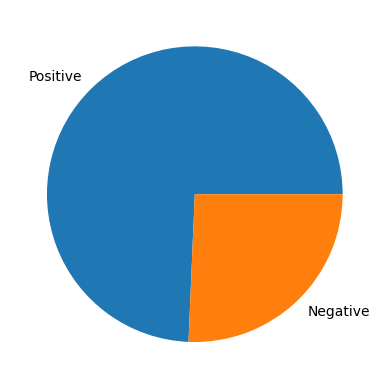

In [52]:
plt.pie(np.array([Y_train.value_counts()[0], Y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [53]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/257.7 kB 187.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/257.7 kB 187.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/257.7 kB 187.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/

In [54]:
#Handling Imbalanced dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_X_train_smote, Y_train_smote = smote.fit_resample(vectorized_X_train,Y_train)
print(vectorized_X_train_smote.shape, Y_train_smote.shape)

(9418, 1145) (9418,)


In [56]:
Y_train_smote.value_counts()

label
0    4709
1    4709
Name: count, dtype: int64

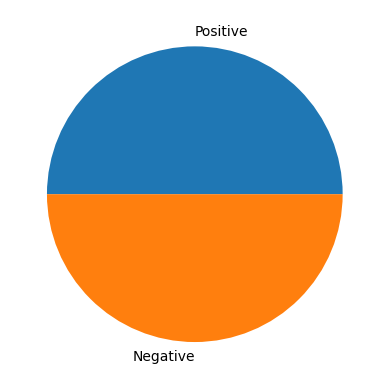

In [57]:
plt.pie(np.array([Y_train_smote.value_counts()[0], Y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

# Model Training and Evaluation

In [58]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC

In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores: \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores: \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

# Logistic Regression

In [69]:
lr = LogisticRegression()
lr.fit(vectorized_X_train_smote,Y_train_smote)

Y_train_pred = lr.predict(vectorized_X_train_smote)
training_scores(Y_train_smote,Y_train_pred)
Y_test_pred = lr.predict(vectorized_X_test)
validation_scores(Y_test,Y_test_pred)

Training Scores: 
	Accuracy = 0.941
	Precision = 0.916
	Recall = 0.971
	F1-Score = 0.943
Testing Scores: 
	Accuracy = 0.869
	Precision = 0.708
	Recall = 0.815
	F1-Score = 0.758


# Naive Bayes

In [70]:
mnb = MultinomialNB ()
mnb.fit(vectorized_X_train_smote,Y_train_smote)

Y_train_pred = mnb.predict(vectorized_X_train_smote)
training_scores(Y_train_smote,Y_train_pred)
Y_test_pred = mnb.predict(vectorized_X_test)
validation_scores(Y_test,Y_test_pred)

Training Scores: 
	Accuracy = 0.906
	Precision = 0.868
	Recall = 0.956
	F1-Score = 0.91
Testing Scores: 
	Accuracy = 0.864
	Precision = 0.672
	Recall = 0.902
	F1-Score = 0.77


# Decision Tree

In [72]:
dt = DecisionTreeClassifier ()
dt.fit(vectorized_X_train_smote,Y_train_smote)

Y_train_pred = dt.predict(vectorized_X_train_smote)
training_scores(Y_train_smote,Y_train_pred)
Y_test_pred = dt.predict(vectorized_X_test)
validation_scores(Y_test,Y_test_pred)

Training Scores: 
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores: 
	Accuracy = 0.821
	Precision = 0.649
	Recall = 0.632
	F1-Score = 0.64


# Random Forest

In [74]:
rf = RandomForestClassifier ()
rf.fit(vectorized_X_train_smote,Y_train_smote)

Y_train_pred = rf.predict(vectorized_X_train_smote)
training_scores(Y_train_smote,Y_train_pred)
Y_test_pred = rf.predict(vectorized_X_test)
validation_scores(Y_test,Y_test_pred)

Training Scores: 
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores: 
	Accuracy = 0.866
	Precision = 0.752
	Recall = 0.699
	F1-Score = 0.725


# Support Vector Machine

In [76]:
svm = SVC ()
svm.fit(vectorized_X_train_smote,Y_train_smote)

Y_train_pred = svm.predict(vectorized_X_train_smote)
training_scores(Y_train_smote,Y_train_pred)
Y_test_pred = svm.predict(vectorized_X_test)
validation_scores(Y_test,Y_test_pred)

Training Scores: 
	Accuracy = 0.979
	Precision = 0.961
	Recall = 0.997
	F1-Score = 0.979
Testing Scores: 
	Accuracy = 0.885
	Precision = 0.758
	Recall = 0.799
	F1-Score = 0.778


In [77]:
import pickle
with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr,file)